### CNN 분류 모델 주제 
- 100가지의 스포츠 이미지를 예측 및 분석(고용량) 

### 📌 작업 방향성  
- 사전훈련모델(EfficientNet, ResNet)을 활용하여, CNN 분류 프로젝트 시행

### 💡 작업 순서   
1. 이미지 전처리 작업 수행(Shift Scale Rotate, ZOOM, horizontal 등등)
2. 기존 데이터 내 이미지 시각화
3. EfficentNet 사전훈련 모델 훈련 실시
4. 예측 결과 시각화
5. ResNet 사전 훈련 모델 훈련 실시
6. 성능 비교
7. 결론

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import tensorflow as tf

train_dir = './datasets/Sports/train/'
validation_dir = './datasets/Sports/valid/'
test_dir = './datasets/Sports/test/'

#### 처음부터 train, validation, test로 나눠진 폴더가 있었기에, 이를 활용해서 작업하기로 하였습니다.

### 📌 Default Setting
> 🔗 Image Size : 224
>
> 🔗 Batch Size : 32
>

In [17]:
IMAGE_SIZE = 224
BATCH_SIZE = 32

train_data_generator = ImageDataGenerator(
        zoom_range=0.2,
        width_shift_range=0.2,height_shift_range=0.2,
        horizontal_flip=True)

validation_data_generator = ImageDataGenerator()
test_data_generator = ImageDataGenerator()

train_generator = train_data_generator.flow_from_directory(
    train_dir,
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical', shuffle=True, seed=42
)

validation_generator = validation_data_generator.flow_from_directory(
    validation_dir,
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical', seed=42
)

test_generator = test_data_generator.flow_from_directory(
    test_dir,
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical', seed=42
)

print(train_generator.class_indices)
print(validation_generator.class_indices)
print(test_generator.class_indices)

Found 13492 images belonging to 100 classes.
Found 500 images belonging to 100 classes.
Found 500 images belonging to 100 classes.
{'air hockey': 0, 'ampute football': 1, 'archery': 2, 'arm wrestling': 3, 'axe throwing': 4, 'balance beam': 5, 'barell racing': 6, 'baseball': 7, 'basketball': 8, 'baton twirling': 9, 'bike polo': 10, 'billiards': 11, 'bmx': 12, 'bobsled': 13, 'bowling': 14, 'boxing': 15, 'bull riding': 16, 'bungee jumping': 17, 'canoe slamon': 18, 'cheerleading': 19, 'chuckwagon racing': 20, 'cricket': 21, 'croquet': 22, 'curling': 23, 'disc golf': 24, 'fencing': 25, 'field hockey': 26, 'figure skating men': 27, 'figure skating pairs': 28, 'figure skating women': 29, 'fly fishing': 30, 'football': 31, 'formula 1 racing': 32, 'frisbee': 33, 'gaga': 34, 'giant slalom': 35, 'golf': 36, 'hammer throw': 37, 'hang gliding': 38, 'harness racing': 39, 'high jump': 40, 'hockey': 41, 'horse jumping': 42, 'horse racing': 43, 'horseshoe pitching': 44, 'hurdles': 45, 'hydroplane racin

#### 총 100개의 타겟 클래스 분포를 확인 하였습니다.

In [18]:
target_name = {v:k for k, v in train_generator.class_indices.items()}
target_name

{0: 'air hockey',
 1: 'ampute football',
 2: 'archery',
 3: 'arm wrestling',
 4: 'axe throwing',
 5: 'balance beam',
 6: 'barell racing',
 7: 'baseball',
 8: 'basketball',
 9: 'baton twirling',
 10: 'bike polo',
 11: 'billiards',
 12: 'bmx',
 13: 'bobsled',
 14: 'bowling',
 15: 'boxing',
 16: 'bull riding',
 17: 'bungee jumping',
 18: 'canoe slamon',
 19: 'cheerleading',
 20: 'chuckwagon racing',
 21: 'cricket',
 22: 'croquet',
 23: 'curling',
 24: 'disc golf',
 25: 'fencing',
 26: 'field hockey',
 27: 'figure skating men',
 28: 'figure skating pairs',
 29: 'figure skating women',
 30: 'fly fishing',
 31: 'football',
 32: 'formula 1 racing',
 33: 'frisbee',
 34: 'gaga',
 35: 'giant slalom',
 36: 'golf',
 37: 'hammer throw',
 38: 'hang gliding',
 39: 'harness racing',
 40: 'high jump',
 41: 'hockey',
 42: 'horse jumping',
 43: 'horse racing',
 44: 'horseshoe pitching',
 45: 'hurdles',
 46: 'hydroplane racing',
 47: 'ice climbing',
 48: 'ice yachting',
 49: 'jai alai',
 50: 'javelin',
 5

In [19]:
train_target_names = []
test_target_names = []
validation_target_names = []

for target in train_generator.classes : 
    train_target_names.append(target_name[target])
    
for target in test_generator.classes : 
    test_target_names.append(target_name[target])

for target in validation_generator.classes : 
    validation_target_names.append(target_name[target])
    
print(len(train_target_names), len(test_target_names), len(validation_target_names))

13492 500 500


#### 📌 Train, Test, Validation DataFrame 생성

In [20]:
import pandas as pd

train_df = pd.DataFrame({'file_paths' : train_generator.filepaths, 
                         'target_names' : train_target_names,
                        'targets' : train_generator.classes})
train_df.file_paths = train_df.file_paths.apply(lambda file_path: file_path.replace('\\', '/'))


test_df = pd.DataFrame({'file_paths' : test_generator.filepaths,
                       'target_names' : test_target_names,
                       'targets' : test_generator.classes})
test_df.file_paths = test_df.file_paths.apply(lambda file_path: file_path.replace('\\', '/'))


validation_df = pd.DataFrame({'file_paths' : validation_generator.filepaths,
                             'target_names' : validation_target_names,
                             'targets' : validation_generator.classes})
validation_df.file_paths = validation_df.file_paths.apply(lambda file_path: file_path.replace('\\', '/'))


display(train_df)
display(validation_df)
display(test_df)

file_paths     target_names  \
0          ./datasets/Sports/train/air hockey/001.jpg       air hockey   
1          ./datasets/Sports/train/air hockey/002.jpg       air hockey   
2          ./datasets/Sports/train/air hockey/003.jpg       air hockey   
3          ./datasets/Sports/train/air hockey/004.jpg       air hockey   
4          ./datasets/Sports/train/air hockey/005.jpg       air hockey   
...                                               ...              ...   
13487  ./datasets/Sports/train/wingsuit flying/94.jpg  wingsuit flying   
13488  ./datasets/Sports/train/wingsuit flying/95.jpg  wingsuit flying   
13489  ./datasets/Sports/train/wingsuit flying/96.jpg  wingsuit flying   
13490  ./datasets/Sports/train/wingsuit flying/97.jpg  wingsuit flying   
13491  ./datasets/Sports/train/wingsuit flying/98.jpg  wingsuit flying   

       targets  
0            0  
1            0  
2            0  
3            0  
4            0  
...        ...  
13487       99  
13488       99  
13489       99  
13490       99  
13491       99  

[13492 rows x 3 columns]

file_paths     target_names  targets
0         ./datasets/Sports/valid/air hockey/1.jpg       air hockey        0
1         ./datasets/Sports/valid/air hockey/2.jpg       air hockey        0
2         ./datasets/Sports/valid/air hockey/3.jpg       air hockey        0
3         ./datasets/Sports/valid/air hockey/4.jpg       air hockey        0
4         ./datasets/Sports/valid/air hockey/5.jpg       air hockey        0
..                                             ...              ...      ...
495  ./datasets/Sports/valid/wingsuit flying/1.jpg  wingsuit flying       99
496  ./datasets/Sports/valid/wingsuit flying/2.jpg  wingsuit flying       99
497  ./datasets/Sports/valid/wingsuit flying/3.jpg  wingsuit flying       99
498  ./datasets/Sports/valid/wingsuit flying/4.jpg  wingsuit flying       99
499  ./datasets/Sports/valid/wingsuit flying/5.jpg  wingsuit flying       99

[500 rows x 3 columns]

file_paths     target_names  targets
0         ./datasets/Sports/test/air hockey/1.jpg       air hockey        0
1         ./datasets/Sports/test/air hockey/2.jpg       air hockey        0
2         ./datasets/Sports/test/air hockey/3.jpg       air hockey        0
3         ./datasets/Sports/test/air hockey/4.jpg       air hockey        0
4         ./datasets/Sports/test/air hockey/5.jpg       air hockey        0
..                                            ...              ...      ...
495  ./datasets/Sports/test/wingsuit flying/1.jpg  wingsuit flying       99
496  ./datasets/Sports/test/wingsuit flying/2.jpg  wingsuit flying       99
497  ./datasets/Sports/test/wingsuit flying/3.jpg  wingsuit flying       99
498  ./datasets/Sports/test/wingsuit flying/4.jpg  wingsuit flying       99
499  ./datasets/Sports/test/wingsuit flying/5.jpg  wingsuit flying       99

[500 rows x 3 columns]

### 📌 샘플 데이터 시각화 

In [21]:
train_df.sample(n=15, random_state=124)

file_paths       target_names  \
11143      ./datasets/Sports/train/speed skating/087.jpg      speed skating   
2290      ./datasets/Sports/train/bungee jumping/084.jpg     bungee jumping   
5079        ./datasets/Sports/train/hammer throw/007.jpg       hammer throw   
11340     ./datasets/Sports/train/sumo wrestling/026.jpg     sumo wrestling   
2882             ./datasets/Sports/train/croquet/007.jpg            croquet   
6878             ./datasets/Sports/train/javelin/093.jpg            javelin   
1758             ./datasets/Sports/train/bobsled/075.jpg            bobsled   
2314      ./datasets/Sports/train/bungee jumping/108.jpg     bungee jumping   
6500        ./datasets/Sports/train/ice climbing/089.jpg       ice climbing   
6488        ./datasets/Sports/train/ice climbing/077.jpg       ice climbing   
763        ./datasets/Sports/train/barell racing/049.jpg      barell racing   
2690   ./datasets/Sports/train/chuckwagon racing/064.jpg  chuckwagon racing   
7705   ./datasets/Sports/train/motorcycle racing/110.jpg  motorcycle racing   
6616        ./datasets/Sports/train/ice yachting/075.jpg       ice yachting   
3027             ./datasets/Sports/train/curling/018.jpg            curling   

       targets  
11143       81  
2290        17  
5079        37  
11340       83  
2882        22  
6878        50  
1758        13  
2314        17  
6500        47  
6488        47  
763          6  
2690        20  
7705        56  
6616        48  
3027        23

### 🏞️ 이미지 시각화 

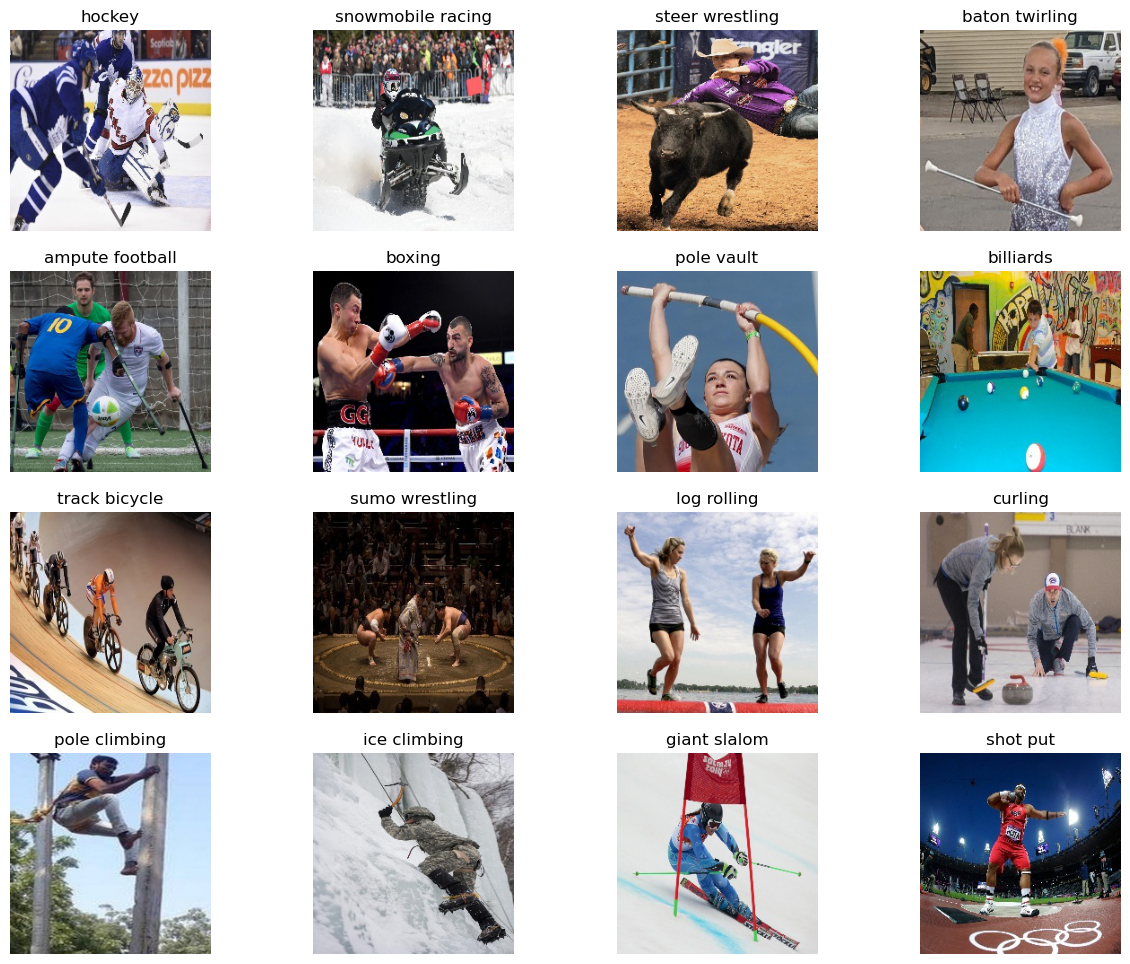

In [22]:
from PIL import Image
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 12))
for i, row in validation_df.sample(n=16).reset_index().iterrows():
    plt.subplot(4, 4, i + 1)
    image_path = row['file_paths']
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(row["target_names"])
    plt.axis('off')
plt.show()



### 💡 1 Cycle  
#### 첫번째 사전훈련 모델 --> Efficent Net으로 작업

### **Efficient Net**

In [23]:
### 설명

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import EfficientNetB0

def create_model(model_name='vgg16', verbose=False) :
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16' :
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50' :
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'efficientnet_b0' :
        model = EfficientNetB0(input_tensor=input_tensor, include_top=False, weights='imagenet')

    x = model.output
    # Classifier
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16' : 
        x  = Dropout(rate=0.25)(x)
    output = Dense(100, activation='softmax', name='output')(x)

    model = Model(inputs=input_tensor, outputs=output)

    if verbose :
        model.summary()
    return model

In [24]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

model = create_model(model_name='efficientnet_b0', verbose=True)
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ rescaling_2 (Rescaling)       │ (None, 224, 224, 3)       │               0 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ normalization_1               │ (None, 224, 224, 3)       │               7 │ rescaling_2[0][0]          │
│ (Normalization)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ rescaling_3 (Rescaling)       │ (None, 224, 224, 3)       │               0 │ normalization_1[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_conv_pad (ZeroPadding2D) │ (None, 225, 225, 3)       │               0 │ rescaling_3[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_conv (Conv2D)            │ (None, 112, 112, 32)      │             864 │ stem_conv_pad[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_bn (BatchNormalization)  │ (None, 112, 112, 32)      │             128 │ stem_conv[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_activation (Activation)  │ (None, 112, 112, 32)      │               0 │ stem_bn[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_dwconv                │ (None, 112, 112, 32)      │             288 │ stem_activation[0][0]      │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_bn                    │ (None, 112, 112, 32)      │             128 │ block1a_dwconv[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_activation            │ (None, 112, 112, 32)      │               0 │ block1a_bn[0][0]           │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_squeeze            │ (None, 32)                │               0 │ block1a_activation[0][0]   │
│ (GlobalAveragePooling2D)      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_reshape (Reshape)  │ (None, 1, 1, 32)          │               0 │ block1a_se_squeeze[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_reduce (Conv2D)    │ (None, 1, 1, 8)           │             264 │ block1a_se_reshape[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_expand (Conv2D)    │ (None, 1, 1, 32)          │             28

 Total params: 4,177,671 (15.94 MB)

 Trainable params: 4,135,648 (15.78 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [25]:
import gc
gc.collect()

55447

In [26]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=4,
    mode='min'
)

In [26]:
N_EPOCHS = 10

history = model.fit(train_generator, 
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_generator,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/10


C:\Users\user\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


422/422 ━━━━━━━━━━━━━━━━━━━━ 816s 2s/step - acc: 0.5080 - loss: 2.1259 - val_acc: 0.8520 - val_loss: 0.5662 - learning_rate: 0.0010
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 709s 2s/step - acc: 0.8517 - loss: 0.5059 - val_acc: 0.8780 - val_loss: 0.4090 - learning_rate: 0.0010
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 680s 2s/step - acc: 0.9025 - loss: 0.3270 - val_acc: 0.8840 - val_loss: 0.3904 - learning_rate: 0.0010
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 671s 2s/step - acc: 0.9117 - loss: 0.2898 - val_acc: 0.9140 - val_loss: 0.3064 - learning_rate: 0.0010
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 634s 1s/step - acc: 0.9274 - loss: 0.2306 - val_acc: 0.8820 - val_loss: 0.5531 - learning_rate: 0.0010
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 649s 2s/step - acc: 0.9348 - loss: 0.2162 - val_acc: 0.9100 - val_loss: 0.3099 - learning_rate: 0.0010
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 798s 2s/step - acc: 0.9594 - loss: 0.1304 - val_acc: 0.9580 - val_loss: 0.1458 - learning_rate: 1.0000e-04
Epoch 

#### ✨ 훈련(fit) 결과 훈련 데이터의 acc 값은 0.98, 검증 데이터의 acc 값은 0.96이 나왔습니다!

In [27]:
model.evaluate(test_generator, batch_size=BATCH_SIZE)

16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 664ms/step - acc: 0.9710 - loss: 0.0842


[0.08066976070404053, 0.9700000286102295]

#### ✨ evaluate를 통해 test 데이터의 성능을 보았을 때 역시 acc값이 0.97로 매우 좋은 수치를 보여주었습니다.

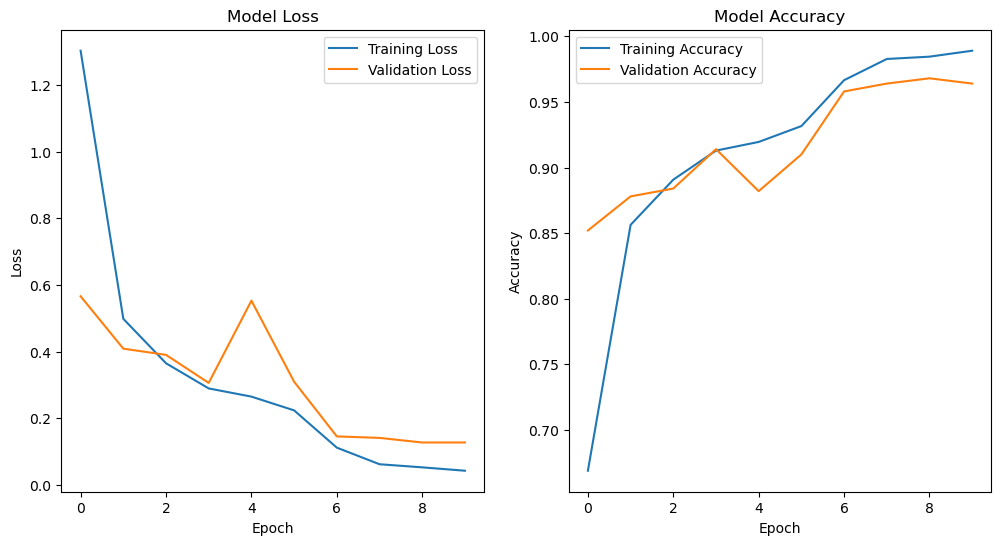

In [32]:
import numpy as np

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.yticks(np.arange(0.7, 1, 0.05))
plt.legend()

plt.show()

### 📌 Chat Graph Image Result
> 사전훈련모델의 훈련데이터와 검증데이터 간의 손실값과 정확도를 Epoch 횟수별로 시각화하였습니다.
>
> 그 결과 검증데이터 부분에서 epoch 4정도에서 약간 튀는 수치를 보였지만, 최종 epoch에 다다라서는, 훈련 데이터의 결과와 비슷하게 변하는 양상을 볼 수 있습니다.

In [27]:
model.save('./callback_files/weights.010-0.1276-0.9890.weights.h5')

### 💡 이미지 폴더 내 복싱에 관련한 이미지를 어떻게 예측할 것인가?

In [49]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model


# 이미지 로드 및 전처리
image = cv2.cvtColor(cv2.imread('./images/boxing1.jpg'), cv2.COLOR_BGR2RGB)
resized_image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
resized_image = np.expand_dims(resized_image, axis=0)

class_names = [
    'air hockey', 'ampute football', 'archery', 'arm wrestling', 'axe throwing', 
    'balance beam', 'barell racing', 'baseball', 'basketball', 'baton twirling', 
    'bike polo', 'billiards', 'bmx', 'bobsled', 'bowling', 'boxing', 'bull riding', 
    'bungee jumping', 'canoe slamon', 'cheerleading', 'chuckwagon racing', 'cricket', 
    'croquet', 'curling', 'disc golf', 'fencing', 'field hockey', 'figure skating men', 
    'figure skating pairs', 'figure skating women', 'fly fishing', 'football', 
    'formula 1 racing', 'frisbee', 'gaga', 'giant slalom', 'golf', 'hammer throw', 
    'hang gliding', 'harness racing', 'high jump', 'hockey', 'horse jumping', 
    'horse racing', 'horseshoe pitching', 'hurdles', 'hydroplane racing', 'ice climbing', 
    'ice yachting', 'jai alai', 'javelin', 'jousting', 'judo', 'lacrosse', 'log rolling', 
    'luge', 'motorcycle racing', 'mushing', 'nascar racing', 'olympic wrestling', 
    'parallel bar', 'pole climbing', 'pole dancing', 'pole vault', 'polo', 
    'pommel horse', 'rings', 'rock climbing', 'roller derby', 'rollerblade racing', 
    'rowing', 'rugby', 'sailboat racing', 'shot put', 'shuffleboard', 'sidecar racing', 
    'ski jumping', 'sky surfing', 'skydiving', 'snow boarding', 'snowmobile racing', 
    'speed skating', 'steer wrestling', 'sumo wrestling', 'surfing', 'swimming', 
    'table tennis', 'tennis', 'track bicycle', 'trapeze', 'tug of war', 'ultimate', 
    'uneven bars', 'volleyball', 'water cycling', 'water polo', 'weightlifting', 
    'wheelchair basketball', 'wheelchair racing', 'wingsuit flying'
]

# 예측 수행
predictions = model.predict(resized_image, batch_size=BATCH_SIZE)

# 가장 높은 확률을 가진 클래스 인덱스
predicted_class_index = np.argmax(predictions, axis=1)[0]


# 예측된 클래스 이름 출력
predicted_class_name = class_names[predicted_class_index]
print(predicted_class_name)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
boxing


### ✨ 복싱으로 잘 예측하는 것을 볼 수 있습니다.

### 📌 이번에는 기존 데이터세트의 Test 폴더에 있는 각종 스포츠 이미지들을 가져와서 예측해보겠습니다.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


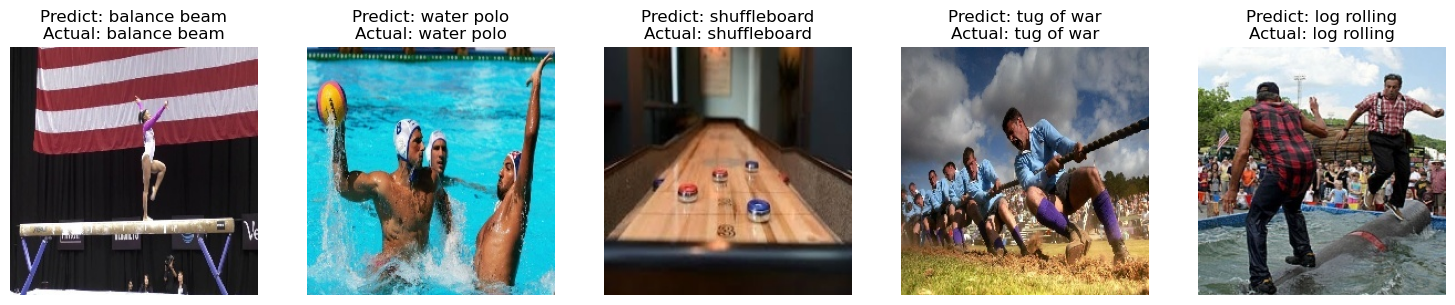

In [42]:
import os
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model


# 이미지 로드 및 전처리

IMAGE_DIR = './datasets/Sports/test/'
IMAGE_SIZE = 224

class_names = [
    'air hockey', 'ampute football', 'archery', 'arm wrestling', 'axe throwing', 
    'balance beam', 'barell racing', 'baseball', 'basketball', 'baton twirling', 
    'bike polo', 'billiards', 'bmx', 'bobsled', 'bowling', 'boxing', 'bull riding', 
    'bungee jumping', 'canoe slamon', 'cheerleading', 'chuckwagon racing', 'cricket', 
    'croquet', 'curling', 'disc golf', 'fencing', 'field hockey', 'figure skating men', 
    'figure skating pairs', 'figure skating women', 'fly fishing', 'football', 
    'formula 1 racing', 'frisbee', 'gaga', 'giant slalom', 'golf', 'hammer throw', 
    'hang gliding', 'harness racing', 'high jump', 'hockey', 'horse jumping', 
    'horse racing', 'horseshoe pitching', 'hurdles', 'hydroplane racing', 'ice climbing', 
    'ice yachting', 'jai alai', 'javelin', 'jousting', 'judo', 'lacrosse', 'log rolling', 
    'luge', 'motorcycle racing', 'mushing', 'nascar racing', 'olympic wrestling', 
    'parallel bar', 'pole climbing', 'pole dancing', 'pole vault', 'polo', 
    'pommel horse', 'rings', 'rock climbing', 'roller derby', 'rollerblade racing', 
    'rowing', 'rugby', 'sailboat racing', 'shot put', 'shuffleboard', 'sidecar racing', 
    'ski jumping', 'sky surfing', 'skydiving', 'snow boarding', 'snowmobile racing', 
    'speed skating', 'steer wrestling', 'sumo wrestling', 'surfing', 'swimming', 
    'table tennis', 'tennis', 'track bicycle', 'trapeze', 'tug of war', 'ultimate', 
    'uneven bars', 'volleyball', 'water cycling', 'water polo', 'weightlifting', 
    'wheelchair basketball', 'wheelchair racing', 'wingsuit flying'
]


def load_random_images(image_dir, class_names, num_images=5):
    # 클래스 이름들을 무작위로 섞고 그 중에서 num_images개 선택
    selected_classes = random.sample(class_names, num_images)
    images = []
    labels = []
    
    for class_name in selected_classes:
        class_dir = os.path.join(image_dir, class_name)
        all_images = [os.path.join(class_dir, img) for img in os.listdir(class_dir) if img.endswith('.jpg')]
        
        # 해당 클래스에서 무작위로 하나의 이미지를 선택
        selected_image = random.choice(all_images)
        images.append(selected_image)
        labels.append(class_name)
    
    return images, labels

def preprocess_image(image_path, image_size):
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    resized_image = cv2.resize(image, (image_size, image_size))
    resized_image = np.expand_dims(resized_image, axis=0)
    return resized_image

# 무작위로 이미지 5개를 로드합니다.
random_images, random_labels = load_random_images(IMAGE_DIR, class_names, num_images=5)

# 각 이미지를 예측하고 결과를 시각화합니다.
plt.figure(figsize=(15, 3))  # 적절한 크기로 설정합니다.

for idx, image_path in enumerate(random_images):
    preprocessed_image = preprocess_image(image_path, IMAGE_SIZE)
    predictions = model.predict(preprocessed_image, batch_size=32)
    predicted_class = np.argmax(predictions[0])
    predicted_class_name = class_names[predicted_class]
    
    # 이미지 시각화
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    plt.subplot(1, 5, idx + 1)  # 1x5 그리드로 이미지 시각화
    plt.imshow(image)
    plt.title(f"Predict: {predicted_class_name}\nActual: {random_labels[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

### ✨ 예측 결과 모든 스포츠 이미지가 예측 된 것을 볼 수 있습니다!

### 💡실제 스포츠 이미지(from 인터넷)를 예측해보자!

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


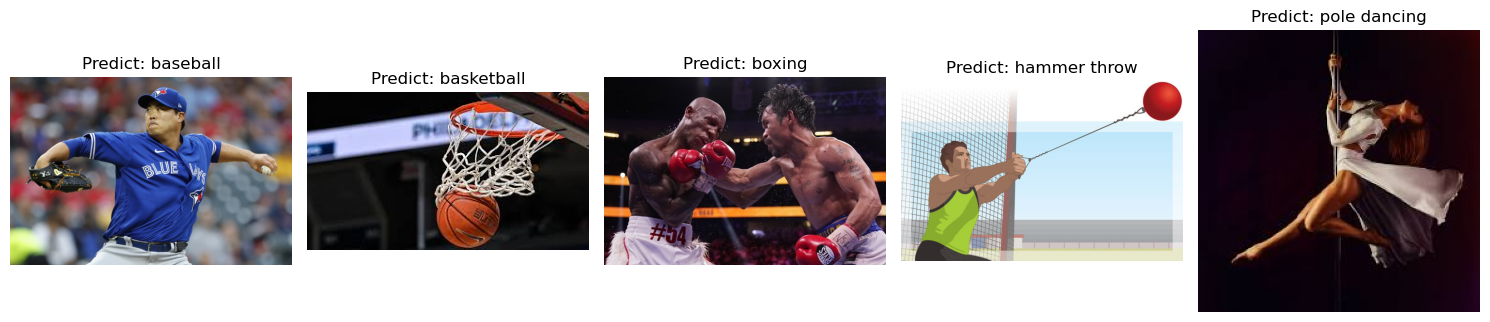

In [65]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# 경로 및 상수 정의
IMAGE_DIR = './images/Screenshot/'
IMAGE_SIZE = 224

class_names = [
    'air hockey', 'ampute football', 'archery', 'arm wrestling', 'axe throwing', 
    'balance beam', 'barell racing', 'baseball', 'basketball', 'baton twirling', 
    'bike polo', 'billiards', 'bmx', 'bobsled', 'bowling', 'boxing', 'bull riding', 
    'bungee jumping', 'canoe slamon', 'cheerleading', 'chuckwagon racing', 'cricket', 
    'croquet', 'curling', 'disc golf', 'fencing', 'field hockey', 'figure skating men', 
    'figure skating pairs', 'figure skating women', 'fly fishing', 'football', 
    'formula 1 racing', 'frisbee', 'gaga', 'giant slalom', 'golf', 'hammer throw', 
    'hang gliding', 'harness racing', 'high jump', 'hockey', 'horse jumping', 
    'horse racing', 'horseshoe pitching', 'hurdles', 'hydroplane racing', 'ice climbing', 
    'ice yachting', 'jai alai', 'javelin', 'jousting', 'judo', 'lacrosse', 'log rolling', 
    'luge', 'motorcycle racing', 'mushing', 'nascar racing', 'olympic wrestling', 
    'parallel bar', 'pole climbing', 'pole dancing', 'pole vault', 'polo', 
    'pommel horse', 'rings', 'rock climbing', 'roller derby', 'rollerblade racing', 
    'rowing', 'rugby', 'sailboat racing', 'shot put', 'shuffleboard', 'sidecar racing', 
    'ski jumping', 'sky surfing', 'skydiving', 'snow boarding', 'snowmobile racing', 
    'speed skating', 'steer wrestling', 'sumo wrestling', 'surfing', 'swimming', 
    'table tennis', 'tennis', 'track bicycle', 'trapeze', 'tug of war', 'ultimate', 
    'uneven bars', 'volleyball', 'water cycling', 'water polo', 'weightlifting', 
    'wheelchair basketball', 'wheelchair racing', 'wingsuit flying'
]

# # 모델 로드 (모델 경로는 실제 모델 파일 경로로 대체해야 합니다)
# model = load_model('path_to_your_model.h5')

def load_images_from_directory(directory, num_images=5):
    images = []
    for img_name in os.listdir(directory)[:num_images]:
        if img_name.endswith(('.jpg', '.jpeg', '.png')):
            images.append(os.path.join(directory, img_name))
    return images

def preprocess_image(image_path, image_size):
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    resized_image = cv2.resize(image, (image_size, image_size))
    resized_image = np.expand_dims(resized_image, axis=0)
    return resized_image

# 이미지 로드
random_images = load_images_from_directory(IMAGE_DIR, num_images=5)

# 각 이미지를 예측하고 결과를 시각화합니다.
plt.figure(figsize=(15, 8))  # 적절한 크기로 설정합니다.

for idx, image_path in enumerate(random_images):
    preprocessed_image = preprocess_image(image_path, IMAGE_SIZE)
    predictions = model.predict(preprocessed_image, batch_size=32)
    predicted_class = np.argmax(predictions[0])
    predicted_class_name = class_names[predicted_class]
    
    # 이미지 시각화
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    plt.subplot(1, 5, idx + 1)  # 1x5 그리드로 이미지 시각화
    plt.imshow(image)
    plt.title(f"Predict: {predicted_class_name}")
    plt.axis('off')

plt.tight_layout()
plt.show()

### 🚩 Result  

- 실제로 모든 스포츠 이미지들이 정확히 예측되는 것을 볼 수 있으며, 심지어 농구공만 보여주었을 뿐인데도, 농구공으로 예측 하는 것을 볼 수 있습니다.

#### ✨ 1 Cycle Result  
> EfficentNet_b0 사전훈련 모델 결과 테스트 데이터의 정확도는 97%, 나머지 훈련 데이터 및 검증 데이터 또한 0.95이상의 값이 나오므로, 매우 성능이 좋은 모델이라고 볼 수 있습니다.
>
> 실제 이미지 Predict 결과 또한 거의 100%에 가까운 예측률을 보이고 있으므로, 매우 좋은 성능을 보입니다.

### ✨ 2 Cycle  
> ResNet 사전 훈련모델을 사용하여 분석

### **ResNet50**

In [29]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

# ResNet50 사전 훈련 모델 불러오기
# ResNet50 모델을 불러오며, ImageNet 데이터셋으로 사전 훈련된 가중치를 사용하고, 최상위 층을 제외하여 입력 형태를 지정합니다.
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

# 베이스 모델의 레이어를 Freeze합니다 (선택 사항, 나중에 미세 조정할 수 있음)
# 베이스 모델의 모든 레이어를 학습되지 않도록 Freeze합니다.
for layer in base_model.layers:
    layer.trainable = False

# 베이스 모델의 출력 텐서를 가져옵니다
x = base_model.output
# GlobalAveragePooling2D 레이어를 추가합니다 (평균 풀링 레이어)
x = GlobalAveragePooling2D()(x)
# 256개의 유닛을 가진 Dense 레이어를 추가하고, ReLU 활성화를 사용합니다
x = Dense(256, activation='relu')(x)
# Dropout 레이어를 추가하여 20%의 드롭아웃을 적용합니다 (과적합 방지)
x = Dropout(rate=0.2)(x)
# 100개의 유닛을 가진 출력 Dense 레이어를 추가하고, 소프트맥스 활성화를 사용합니다 (클래스 수는 100)
predictions = Dense(100, activation='softmax')(x)

# 모델을 생성합니다 (입력은 base_model의 입력, 출력은 예측 레이어)
model_resnet = Model(inputs=base_model.input, outputs=predictions)
# 모델 요약을 출력합니다
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ rescaling_2 (Rescaling)       │ (None, 224, 224, 3)       │               0 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ normalization_1               │ (None, 224, 224, 3)       │               7 │ rescaling_2[0][0]          │
│ (Normalization)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ rescaling_3 (Rescaling)       │ (None, 224, 224, 3)       │               0 │ normalization_1[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_conv_pad (ZeroPadding2D) │ (None, 225, 225, 3)       │               0 │ rescaling_3[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_conv (Conv2D)            │ (None, 112, 112, 32)      │             864 │ stem_conv_pad[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_bn (BatchNormalization)  │ (None, 112, 112, 32)      │             128 │ stem_conv[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_activation (Activation)  │ (None, 112, 112, 32)      │               0 │ stem_bn[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_dwconv                │ (None, 112, 112, 32)      │             288 │ stem_activation[0][0]      │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_bn                    │ (None, 112, 112, 32)      │             128 │ block1a_dwconv[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_activation            │ (None, 112, 112, 32)      │               0 │ block1a_bn[0][0]           │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_squeeze            │ (None, 32)                │               0 │ block1a_activation[0][0]   │
│ (GlobalAveragePooling2D)      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_reshape (Reshape)  │ (None, 1, 1, 32)          │               0 │ block1a_se_squeeze[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_reduce (Conv2D)    │ (None, 1, 1, 8)           │             264 │ block1a_se_reshape[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_expand (Conv2D)    │ (None, 1, 1, 32)          │             28

 Total params: 4,177,673 (15.94 MB)

 Trainable params: 4,135,648 (15.78 MB)

 Non-trainable params: 42,023 (164.16 KB)

 Optimizer params: 2 (12.00 B)

In [30]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience= 5, restore_best_weights=True)

In [31]:
model_resnet.compile(optimizer='adam',loss='categorical_crossentropy'
                 ,metrics=['accuracy'])

In [32]:
history2=model_resnet.fit(
        train_generator,
        epochs = 10,
        validation_data = validation_generator,
        callbacks = early_stopping)

Epoch 1/10


C:\Users\user\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


422/422 ━━━━━━━━━━━━━━━━━━━━ 532s 1s/step - accuracy: 0.2319 - loss: 3.3962 - val_accuracy: 0.7340 - val_loss: 0.9728
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 457s 1s/step - accuracy: 0.6130 - loss: 1.3625 - val_accuracy: 0.7980 - val_loss: 0.6492
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 448s 1s/step - accuracy: 0.7053 - loss: 1.0414 - val_accuracy: 0.8360 - val_loss: 0.5172
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 470s 1s/step - accuracy: 0.7335 - loss: 0.9036 - val_accuracy: 0.8420 - val_loss: 0.4861
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 515s 1s/step - accuracy: 0.7535 - loss: 0.8144 - val_accuracy: 0.8720 - val_loss: 0.4324
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 476s 1s/step - accuracy: 0.7747 - loss: 0.7404 - val_accuracy: 0.8660 - val_loss: 0.4537
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 390s 917ms/step - accuracy: 0.7938 - loss: 0.6670 - val_accuracy: 0.8880 - val_loss: 0.3825
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 415s 977ms/step - accuracy: 0.7995 - loss: 0.6375 - val_accuracy:

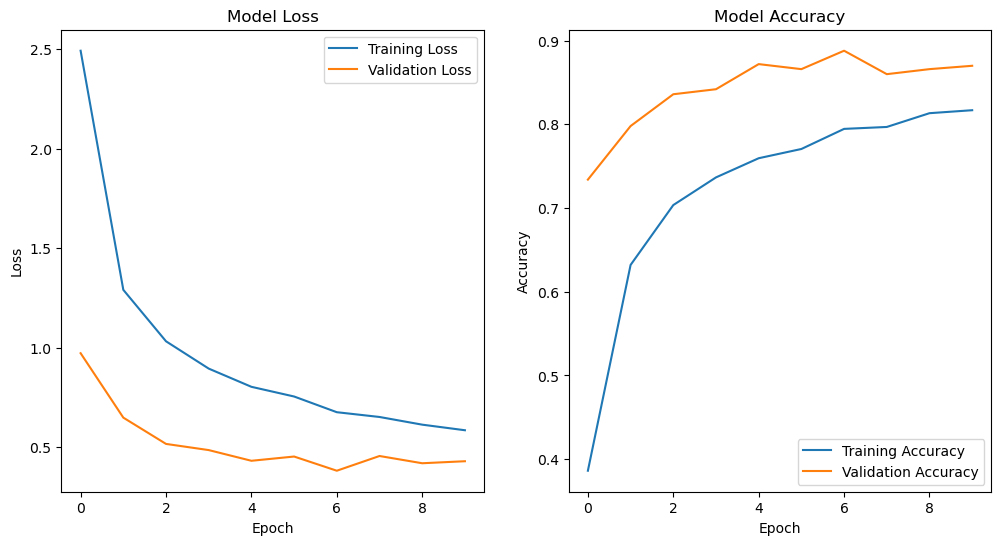

In [33]:
import matplotlib.pyplot as plt

# Plot training & validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [35]:
model_resnet.evaluate(test_generator, batch_size=BATCH_SIZE)

16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 641ms/step - accuracy: 0.8874 - loss: 0.3397


[0.3582501709461212, 0.878000020980835]

### ✨ 2 Cycle Result  
> ResNet50 사전훈련 모델을 사용하였을 때 전체적으로, 검증데이터와 테스트데이터의 accuracy가 더 높은 것을 알 수 있었고, 훈련 데이터 또한 0.82가량으로 나왔으며,
>
>  epoch를 더 많이 주었으면, 더 높아질 가능성이 높기때문에, 해당 ResNet50 모델 또한 성능이 좋은 것을 알 수 있습니다. 

### Total Result  
- 최종 CNN 분석 결과 최적의 성능을 보이는 사전훈련 모델은  97~98 % 정도의 정확도를 보인 EfficentB0 모델이라고 볼 수 있겠습니다.

### 📌 Efficent Net이란 ?  

<img src="./images/efficentNet.png" width="600px">  


-  EfficientNet은 네트워크의 깊이를 깊게 하고, 채널의 길이(필터 수)를 늘리며, 입력 이미지의 해상도를 높이는 방식으로 모델의 성능을 향상시킨 모델입니다.

-  1. More Width (channel Width increase!)
   2. More Deep (Network Depth more deeper!)
   3. More Resolution Scaling (High-Resolution Image)
> 👦🏻 EfficentNet은 이 3가지의 최적의 조합을 AutoML을 통해 찾은 논문입니다. 그래서 위 조합을 효율적으로 만들 수 있도록 하는 compound scaling 방법을 제안하며 이를 통해 더 작은 크기의 모델로도 높은 성능을 보여준 모델입니다.

-  즉, EfficientNet은 모델의 크기와 복잡도를 동시에 증가시키면서도 효율적으로 성능을 극대화한 최신 딥러닝 모델입니다. 